In [1]:
!pip install seaborn
!pip install plotly==4.14.1
!pip install plotly-express

     |████████████████████████████████| 13.2MB 344kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px

### **Question:**
* What is the overall sales trend?

* Which are the Top 10 products by sales?

* Which are the Most Selling Products?

* Which is the most preferred Ship Mode?

* Which are the Most Profitable Category and Sub-Category?

In [3]:
home = '/content/drive/MyDrive/ai/machine_learning/superstore-sales-analysis/'
df = pd.read_excel(f'{home}superstore_sales.xlsx')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [5]:
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [6]:
df.describe().round()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,246.0,3.0,0.0,29.0,26.0,2013.0
std,488.0,2.0,0.0,174.0,57.0,1.0
min,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,31.0,2.0,0.0,0.0,3.0,2012.0
50%,85.0,3.0,0.0,9.0,8.0,2013.0
75%,251.0,5.0,0.0,37.0,24.0,2014.0
max,22638.0,14.0,1.0,8400.0,934.0,2014.0


### **WHAT IS THE OVERALL SALES TREND?**

In [7]:
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))
df_temp = df.groupby('month_year').sum()['sales'].reset_index()

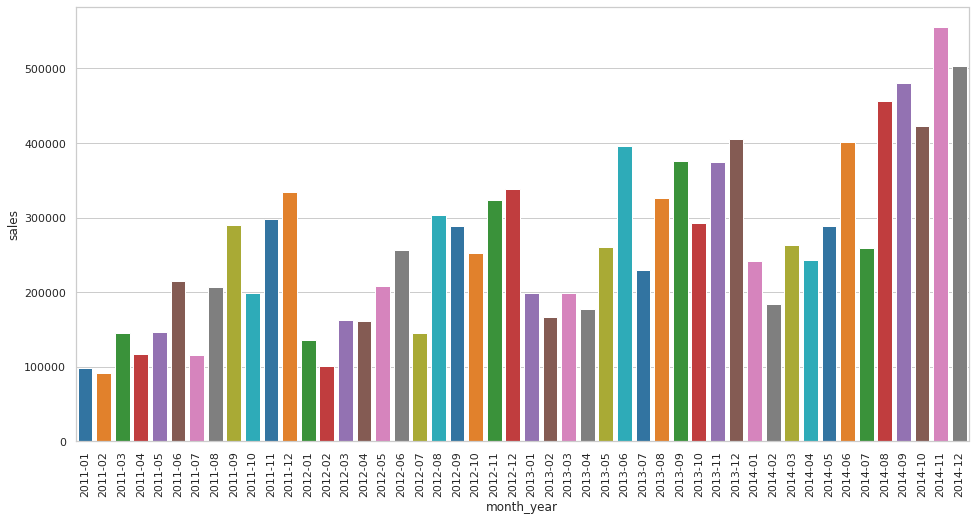

In [8]:
plt.figure(figsize=(16, 8))
sns.set_theme(style="whitegrid")
sns.barplot(x=df_temp['month_year'], y=df_temp['sales'], data=df_temp, palette='tab10')
plt.xticks(rotation='vertical')
plt.show()

### **WHICH ARE THE TOP 10 PRODUCTS BY SALES?**

In [9]:
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])
prod_sales.sort_values(by=['sales'], inplace=True, ascending=False)
top10_prod = prod_sales[:10]
top10_prod

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


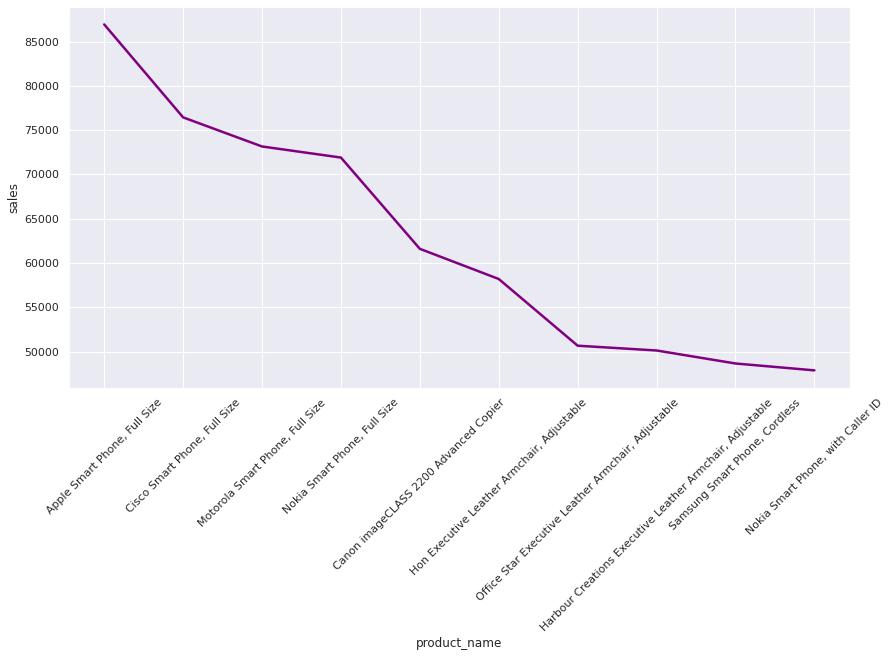

In [12]:
plt.figure(figsize=(14, 7))
sns.set_theme(style="darkgrid")
sns.lineplot(x=top10_prod.index, y=top10_prod['sales'], data=top10_prod, color='purple', linewidth=2.5)
plt.xticks(rotation=45)
plt.show()

### **WHICH ARE THE MOST SELLING PRODUCTS?**

In [13]:
most_sales_prod = pd.DataFrame(df.groupby(['product_name']).sum()['quantity'])
most_sales_prod.sort_values(by=['quantity'], inplace=True, ascending=False)
top_sales = most_sales_prod[:10]
top_sales

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


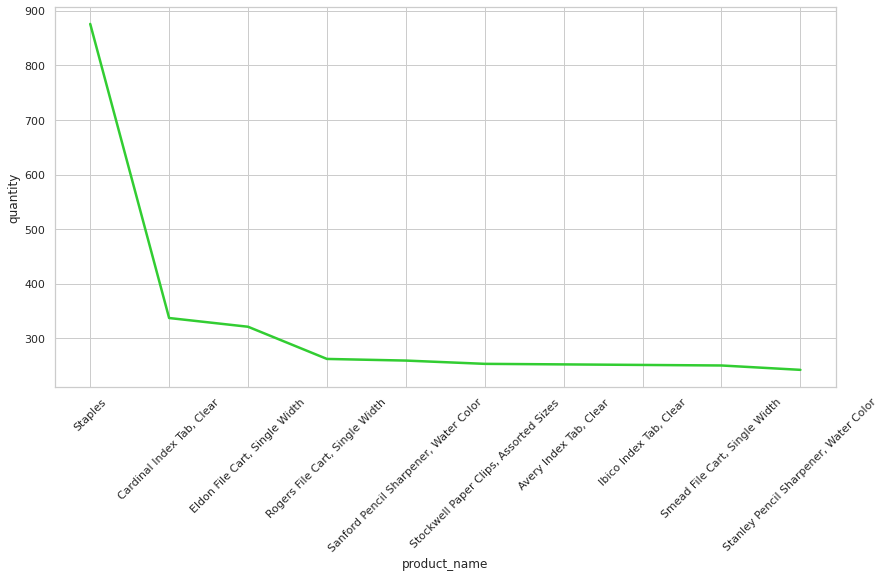

In [14]:
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid")
sns.lineplot(x=top_sales.index, y=top_sales['quantity'], data=top_sales, color='limegreen', linewidth=2.5)
plt.xticks(rotation=45)
plt.show()

### **WHAT IS THE MOST PREFERRED SHIP MODE?**

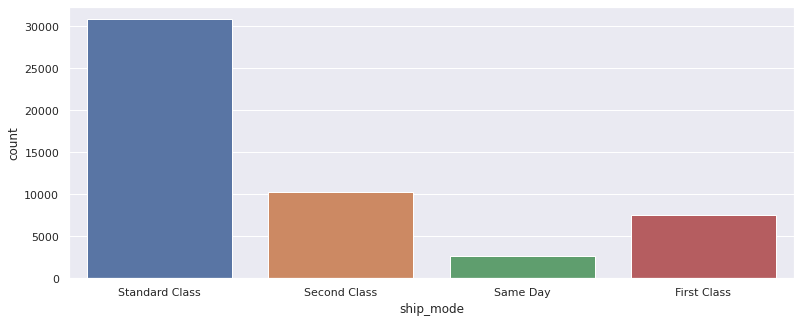

In [15]:
# pref_ship_mode = pd.DataFrame(df.groupby('ship_mode').sum()['quantity'])
# pref_ship_mode.sort_values(by=['quantity'], inplace=True, ascending=False)
plt.figure(figsize=(13, 5))
sns.set_theme(style="darkgrid")
sns.countplot(x='ship_mode', data=df)
plt.show()

### **WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?**

In [16]:
most_profit_cat = pd.DataFrame(df.groupby('category').sum()['profit'])
most_profit_cat.sort_values(by=['profit'], ascending=False)
most_profit_cat

,profit
category,
Furniture,286782.25380
Office Supplies,518473.83430
Technology,663778.73318


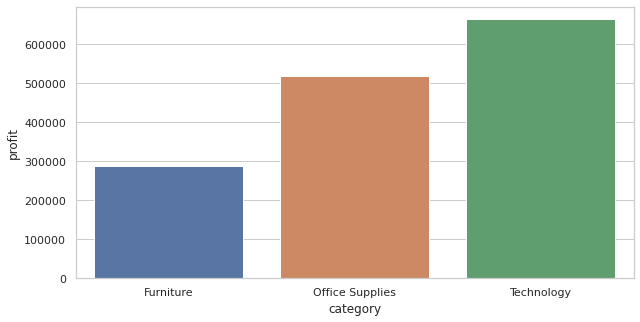

In [17]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.barplot(x=most_profit_cat.index, y=most_profit_cat['profit'], data=most_profit_cat)
plt.show()

In [18]:
most_profit_sub = pd.DataFrame(df.groupby('sub_category').sum()['profit'])
most_profit_sub.sort_values(by=['profit'], ascending=False)
most_profit_sub

,profit
sub_category,
Accessories,129626.30620
Appliances,141680.58940
Art,57953.91090
Binders,72449.84600
Bookcases,161924.41950
Chairs,141973.79750
Copiers,258567.54818
Envelopes,29601.11630
Fasteners,11525.42410


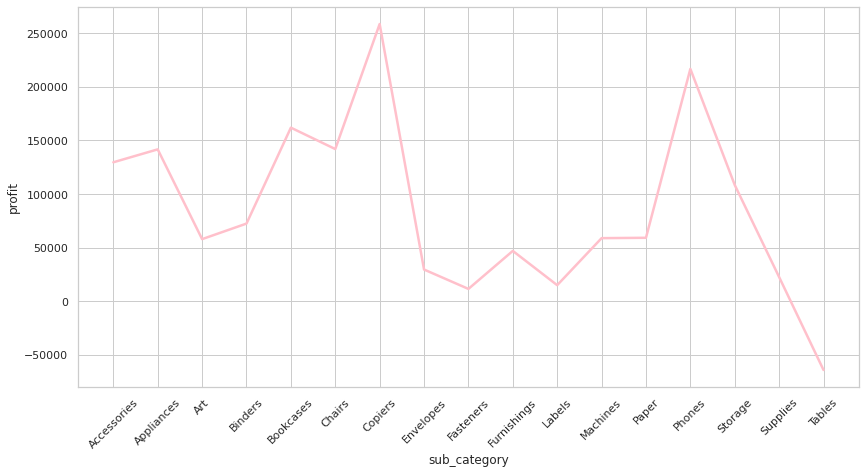

In [19]:
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid")
sns.lineplot(x=most_profit_sub.index, y=most_profit_sub['profit'], data=most_profit_sub, color='pink', linewidth=2.5)
plt.xticks(rotation=45)
plt.show()